<a href="https://colab.research.google.com/github/DigDataSteve/Bank_Financing_Analysis/blob/main/Bank_Finance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Finance Analysis Project

# Make a Connection to Google Drive and Read Data 

In [1]:
#Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px

In [3]:
#Check for files
path = "/content/drive/MyDrive/Bank_Finance_Modeling/Data"
files = os.listdir(path)
files

['Bank_Personal_Loan_Modelling.xlsx']

In [4]:
#Read excel sheet, 'Data', into dataframe
df = pd.read_excel(path+'/Bank_Personal_Loan_Modelling.xlsx', 1)
df.shape

(5000, 14)

In [5]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

# Prepare Data for Analysis

In [6]:
#Check for null values
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
#Remove columns not being used for analysis. Set 'inplace' to True to update the dataframe. Set parameter, 'axix=1' to remove columns from dataframe.
df.drop(['ID', 'ZIP Code'], axis=1, inplace=True)

In [8]:
#Check that columns were removed
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

# Perform Five-Number Summary 
   *Minimum, 25%, Median, 75%, Maximum numbers for dataset

In [9]:
#Use plotly boxplot to get an initial five-number summary
fig = px.box(df, y=['Age', 'Experience', 'Income', 'Family', 'Education'], title='Initial Analysis')
fig.update_layout(template='plotly_dark')
fig.show()

In [10]:
#View outlier information on dataset
df.skew()
#Note that 'Income' has the highest skewness of the five columns being analyzed

Age                  -0.029341
Experience           -0.026325
Income                0.841339
Family                0.155221
CCAvg                 1.598457
Education             0.227093
Mortgage              2.104002
Personal Loan         2.743607
Securities Account    2.588268
CD Account            3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64

# Visualize data in dataframe

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f52bd8fbaf0>,
      dtype=object)

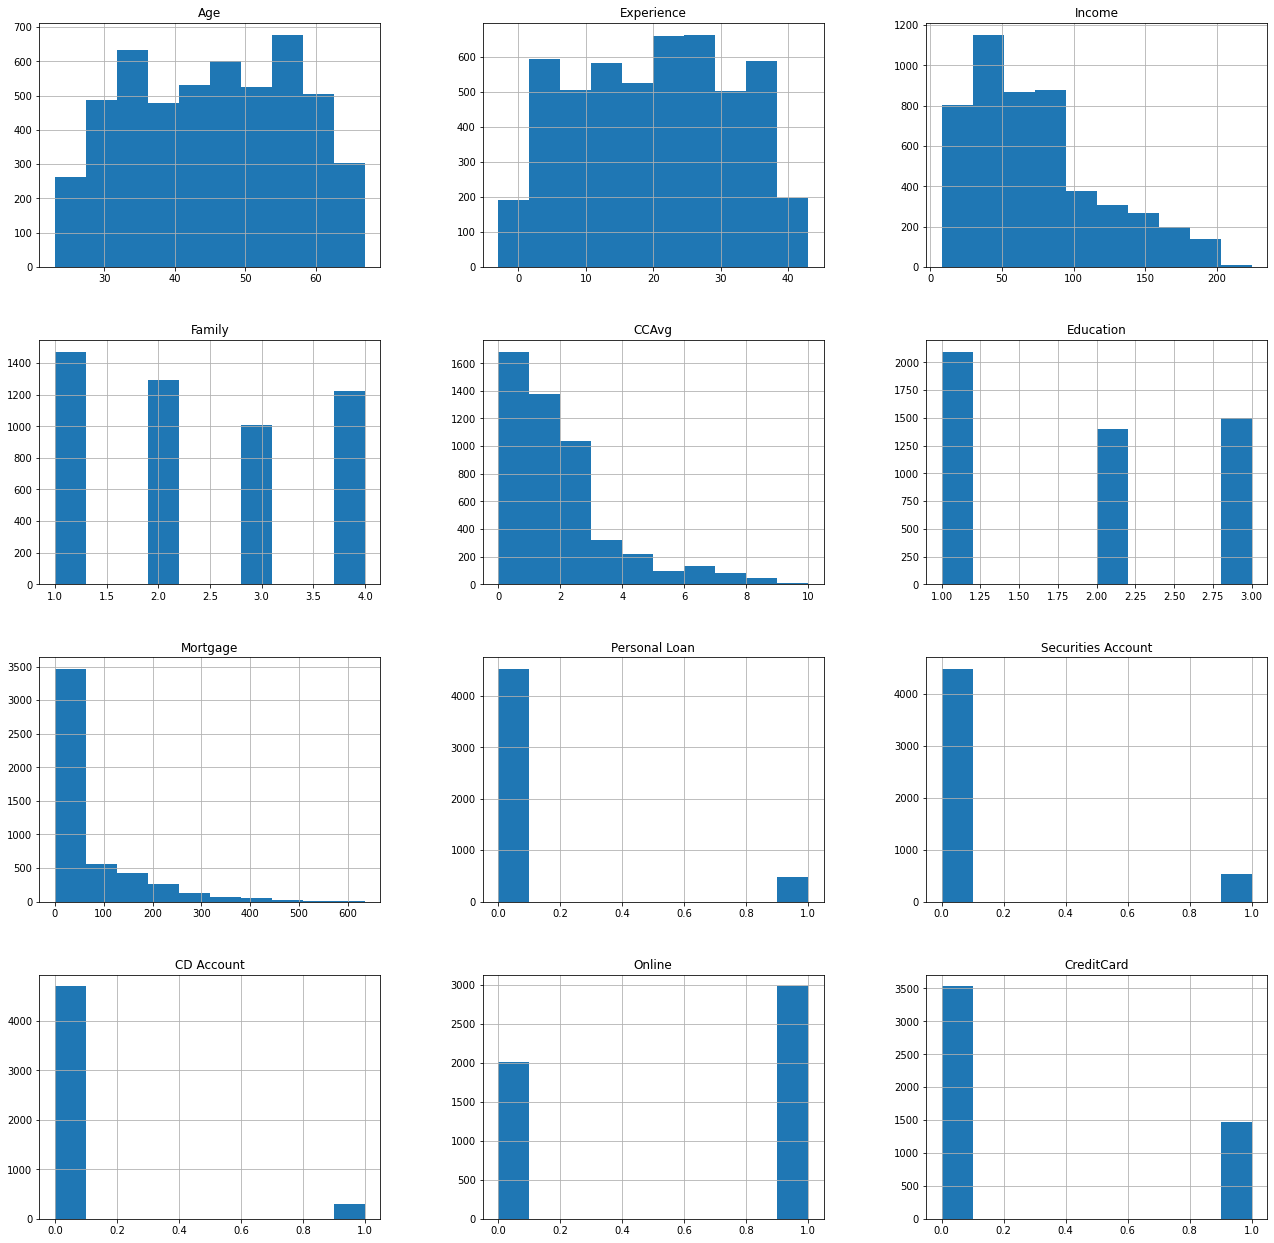

In [11]:
#Visualize Skewness
df.hist(figsize=(22,22))

# Clean Data
   Clean the data with negative experience

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



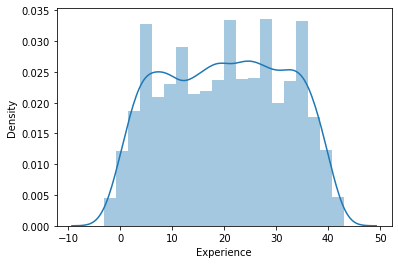

In [12]:
#Further viaualize 'Experience' since it has negative values and you cannot have negative experience
sns.distplot(df['Experience'])

In [13]:
#Capture all negative values of the 'Experience' data
neg_exp = df[df['Experience']<0]
neg_exp.shape

(52, 12)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



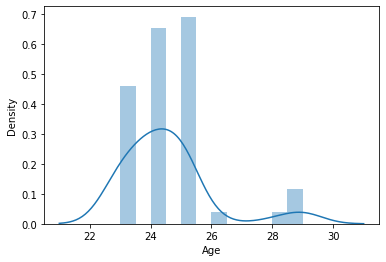

In [14]:
#Where is the negative experience coming from?
sns.distplot(neg_exp['Age'])

In [15]:
neg_exp['Experience'].mean()

-1.4423076923076923

In [16]:
print('There are {} rows with negative \'Experience\'. This is approximately {}% of the total data.'.format(neg_exp.size, (neg_exp.size/df.size)*100))

There are 624 rows with negative 'Experience'. This is approximately 1.04% of the total data.


In [17]:
#Make a copy of the original dataframe, df, that will hold the cleaned data that fixes the negative experience issue
exp_data = df.copy()
#Put in the mean value of all the experiences into the rows with negative experience
exp_data['Experience'] = np.where(exp_data['Experience']<0, exp_data['Experience'].mean(), exp_data['Experience'])

In [18]:
#Check for any negative values in the Experience Column
exp_data[exp_data['Experience']<0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


# Visualize the Correlation Between Variables
   Correlation is the relationship between two variables. Correlation can be positive (e.g. As the sun rises in the sky, the brighter it becomes), or negative (e.g. the longer someone runs, the more weight is lost for that person).

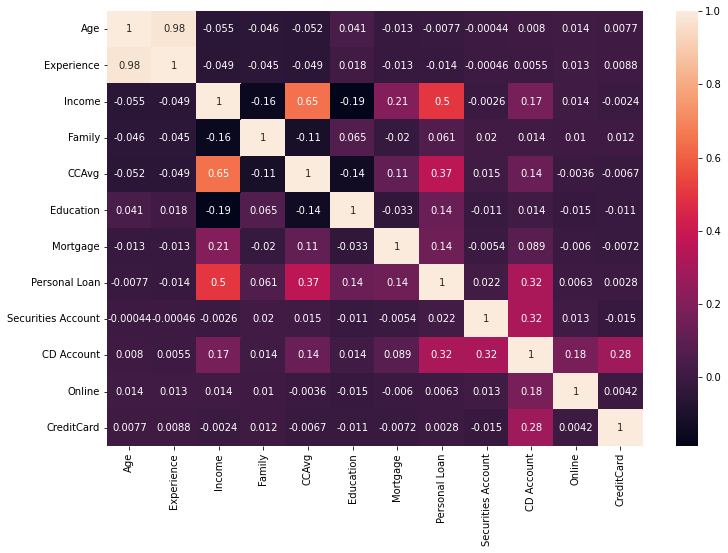

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(exp_data.corr(), annot=True)

# Analyze Education

In [20]:
ed_data = exp_data.copy()
ed_data['Education'].unique()

array([1, 2, 3])

In [21]:
#Create function to create education categories
def ed_category(ed):
  if ed==1:
    return 'Undergrad Degree'
  elif ed==2:
    return 'Graduate Degree'
  elif ed==3:
    return 'Doctorate Degree'
  else:
    return 'No College Degree'


In [22]:
ed_data['Education_Category'] = ed_data['Education'].apply(ed_category)
ed_data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Category
0,25,1.0,49,4,1.6,1,0,0,1,0,0,0,Undergrad Degree
1,45,19.0,34,3,1.5,1,0,0,1,0,0,0,Undergrad Degree
2,39,15.0,11,1,1.0,1,0,0,0,0,0,0,Undergrad Degree
3,35,9.0,100,1,2.7,2,0,0,0,0,0,0,Graduate Degree
4,35,8.0,45,4,1.0,2,0,0,0,0,0,1,Graduate Degree


In [23]:
ed_degree_count = ed_data.groupby('Education_Category')['Income'].count()
ed_degree_count

Education_Category
Doctorate Degree    1501
Graduate Degree     1403
Undergrad Degree    2096
Name: Income, dtype: int64

In [24]:
px.pie(ed_data, values=ed_degree_count, names=ed_degree_count.index, title='Pie Chart Showing Distribution of College Education', template='plotly_dark')

# Analyze Security and Deposit Information

In [25]:
sec_dep_data = exp_data.copy()
sec_dep_data.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [26]:
#Create function to categorize security and deposit infformation
def sec_dep(row):
  if (row['Securities Account']==1) & (row['CD Account']==1):
    return 'Has Securities and CD Deposit'
  elif (row['Securities Account']==0) & (row['CD Account']==1):
    return 'Has CD Deposit Only'
  elif (row['Securities Account']==1) & (row['CD Account']==0):
    return 'Has Securities Account Only'
  elif (row['Securities Account']==0) & (row['CD Account']==0):
    return 'No Securities Nor CD Deposit'

In [27]:
#Call sec_dep function to create new column in dataframe
sec_dep_data['Acct Type Holder'] = sec_dep_data.apply(sec_dep, axis=1)
sec_dep_data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Acct Type Holder
0,25,1.0,49,4,1.6,1,0,0,1,0,0,0,Has Securities Account Only
1,45,19.0,34,3,1.5,1,0,0,1,0,0,0,Has Securities Account Only
2,39,15.0,11,1,1.0,1,0,0,0,0,0,0,No Securities Nor CD Deposit
3,35,9.0,100,1,2.7,2,0,0,0,0,0,0,No Securities Nor CD Deposit
4,35,8.0,45,4,1.0,2,0,0,0,0,0,1,No Securities Nor CD Deposit


In [28]:
acct_hld_data = sec_dep_data['Acct Type Holder'].value_counts()

In [29]:
px.pie(sec_dep_data, values=acct_hld_data, names=acct_hld_data.index, title='Type of Account Holder', template='plotly_dark')

# Analyze Customer Based on Education, Income, Personal Loans
  Copy the 'exp_data' frame (that no longer has negative experiences) into the dataframe, 'eip_data'

In [30]:
eip_data = exp_data.copy()
eip_data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1.0,49,4,1.6,1,0,0,1,0,0,0
1,45,19.0,34,3,1.5,1,0,0,1,0,0,0
2,39,15.0,11,1,1.0,1,0,0,0,0,0,0
3,35,9.0,100,1,2.7,2,0,0,0,0,0,0
4,35,8.0,45,4,1.0,2,0,0,0,0,0,1


In [31]:
#Show distribution of education and income for those bank customers that do not have a loan and those with a loan
px.box(eip_data, x='Education', y='Income', facet_col='Personal Loan')

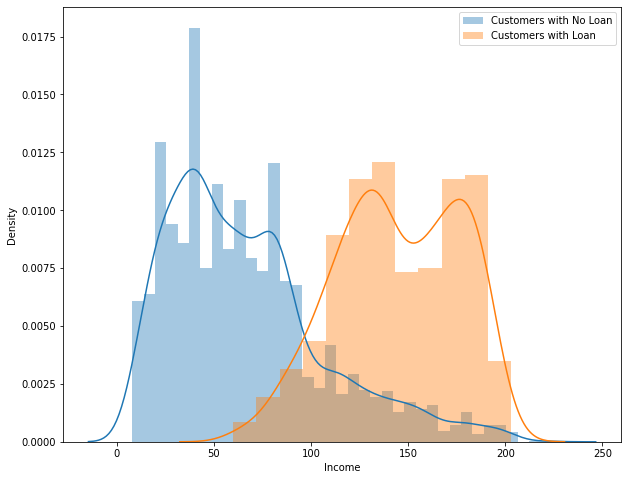

In [32]:
#Import the 'warnings' library to suppress FutureWarnings messages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Visualize income for customers without loand and with a loan
plt.figure(figsize=(10,8))
sns.distplot(eip_data[eip_data['Personal Loan']==0]['Income'], label='Customers with No Loan')
sns.distplot(eip_data[eip_data['Personal Loan']==1]['Income'], label='Customers with Loan')
plt.legend()

# Write Function to Automate Visualization Analysis

In [33]:
def v_plot(col1, col2, label1, label2, title):
  plt.figure(figsize=(12,8))
  sns.distplot(eip_data[eip_data[col2]==0][col1], label=label1)
  sns.distplot(eip_data[eip_data[col2]==1][col1], label=label2)
  plt.legend()
  plt.title(title)

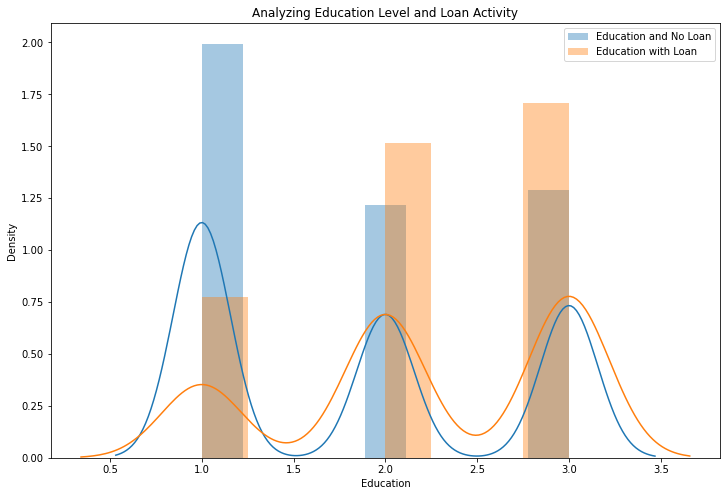

In [34]:
v_plot('Education', 'Personal Loan', 'Education and No Loan', 'Education with Loan', 'Analyzing Education Level and Loan Activity')

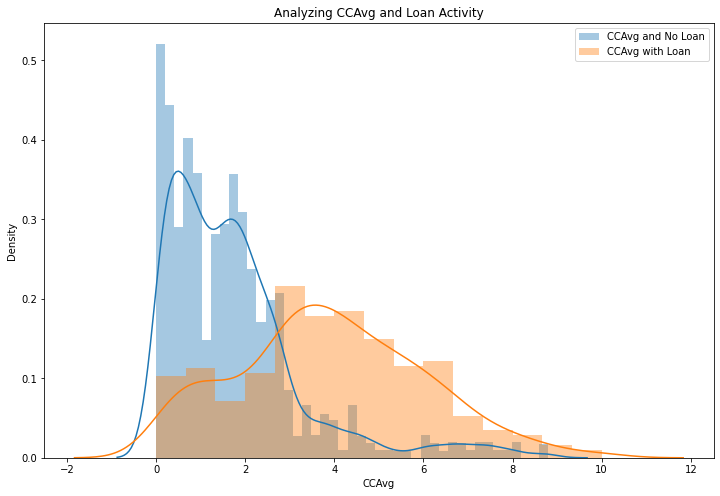

In [35]:
v_plot('CCAvg', 'Personal Loan', 'CCAvg and No Loan', 'CCAvg with Loan', 'Analyzing {} and Loan Activity'.format('CCAvg')) 

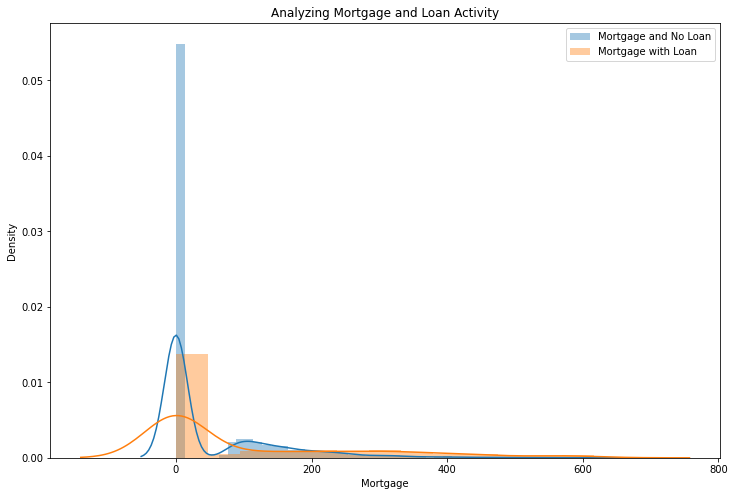

In [36]:
v_plot('Mortgage', 'Personal Loan', 'Mortgage and No Loan', 'Mortgage with Loan', 'Analyzing {} and Loan Activity'.format('Mortgage')) 

# Analyze Customer Behavior

In [37]:
#Check column names
eip_data.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [38]:
#Add column to dataframe showing the type of account that the customer has and name the datafram c_data
c_data = eip_data.copy()
c_data['Securities & CDs'] = c_data.apply(sec_dep, axis=1)
c_data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Securities & CDs
0,25,1.0,49,4,1.6,1,0,0,1,0,0,0,Has Securities Account Only
1,45,19.0,34,3,1.5,1,0,0,1,0,0,0,Has Securities Account Only
2,39,15.0,11,1,1.0,1,0,0,0,0,0,0,No Securities Nor CD Deposit
3,35,9.0,100,1,2.7,2,0,0,0,0,0,0,No Securities Nor CD Deposit
4,35,8.0,45,4,1.0,2,0,0,0,0,0,1,No Securities Nor CD Deposit


In [39]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


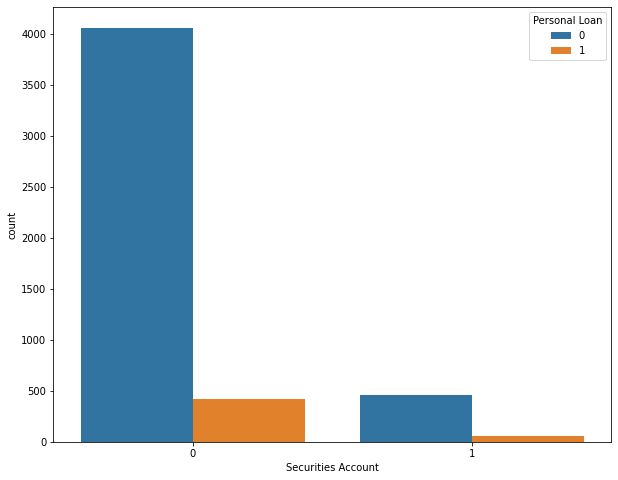

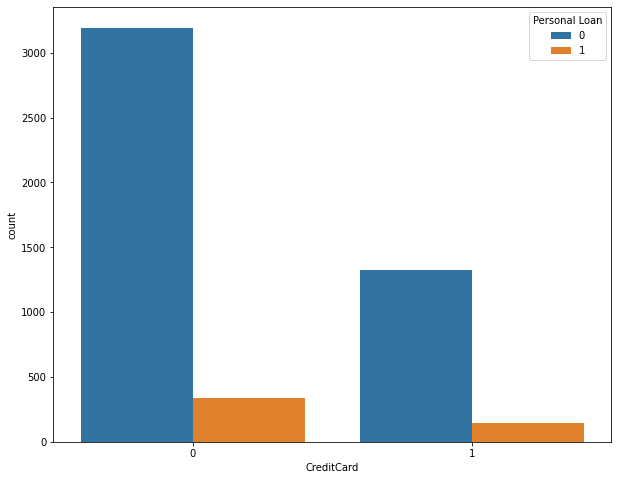

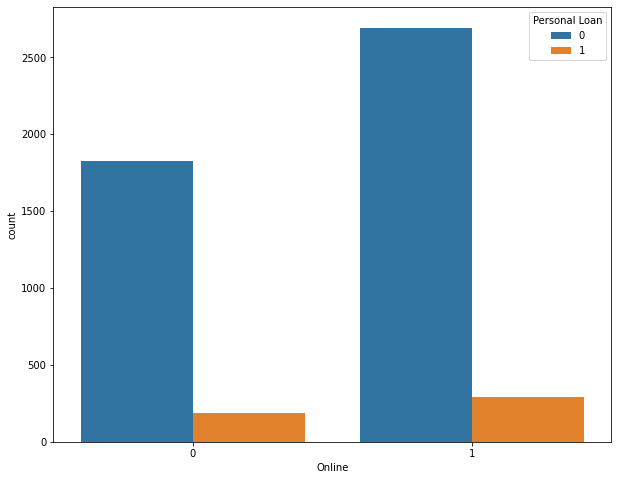

In [40]:
#Create list to hold columns that will be analyzed
col_names = ['Securities Account', 'CreditCard', 'Online']
for c in col_names:
  plt.figure(figsize=(10,8))
  sns.countplot(x=c, hue='Personal Loan', data=c_data)

# Does Customer Age Affect Loans?
  Conducdt a t-test to analyze the averages of two groups and if age is a factor for customers that got a personal loan and customers that did not get a personal loan.
  

*   Ho = Age does not affect getting a personal loan.
*   Ha = Age does affect getting a personal loan.


  

In [54]:
#import stats module

Ho = 'Age does not affect getting a personal loan'
Ha = 'Age does affect getting a personal loan'

import scipy.stats as stats
age_no = np.array(c_data[c_data['Personal Loan']==0]['Age'])
age_yes = np.array(c_data[c_data['Personal Loan']==1]['Age'])

#Use ttest for 2-independent variables
ttest_value,p_value = stats.ttest_ind(age_no, age_yes, axis=0)

In [55]:
if p_value < 0.05:
  print(Ha, ' because the p_value is less than 0.05 and is {}'.format(p_value))
else:
  print(Ho, ' because the p_value is greater than 0.05 and is {}'.format(p_value))

Age does not affect getting a personal loan  because the p_value is greater than 0.05 and is 0.584959263705325


In [60]:
#Automate the hypothesis testing from above
def hyp_test(col1, col2, Ho, Ha):
  Ho = Ho + ' does not affect getting a personal loan'
  Ha = Ha + ' does affect getting a personal loan'

  arr1 = np.array(c_data[c_data[col1]==0][col2])
  arr2 = np.array(c_data[c_data[col1]==1][col2])
  ttest_value,p_value = stats.ttest_ind(arr1, arr2, axis=0)
  if p_value < 0.05:
    print('{} because the p_value is less than 0.05 and is {}'.format(Ha, p_value))
  else:
    print('{} because the p_value is greater than 0.05 and is {}'.format(Ho, p_value))

In [64]:
hyp_test('Personal Loan', 'Age', 'Age', 'Age')

Age does not affect getting a personal loan because the p_value is greater than 0.05 and is 0.584959263705325


In [65]:
#Does Income influence getting a loan?
hyp_test('Personal Loan', 'Income', 'Income', 'Imcome')

Imcome does affect getting a personal loan because the p_value is less than 0.05 and is 0.0


In [66]:
#Does family size impact getting a loan?
hyp_test('Personal Loan', 'Family', 'Family', 'Family')

Family does affect getting a personal loan because the p_value is less than 0.05 and is 1.4099040685673807e-05
